In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

In [42]:
PROMPTS = [1, 2, 3, 4]
CKPTS = [0, 153600, 307200, 460800, 614400]

In [43]:
fileformat = '/home/echeng/llm_compositionality/data/saved_reps_post_finetune/prompts_{}_step_{}_gride.json' # prompt, ckpt

/tmp/ipykernel_1554752/3276526973.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
/tmp/ipykernel_1554752/3276526973.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
/tmp/ipykernel_1554752/3276526973.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
/tmp/ipykernel_1554752/3276526973.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
/tmp/ipykernel_1554752/3276526973.py:19: UserWarning: set_ticklabels() should only be used with a fi

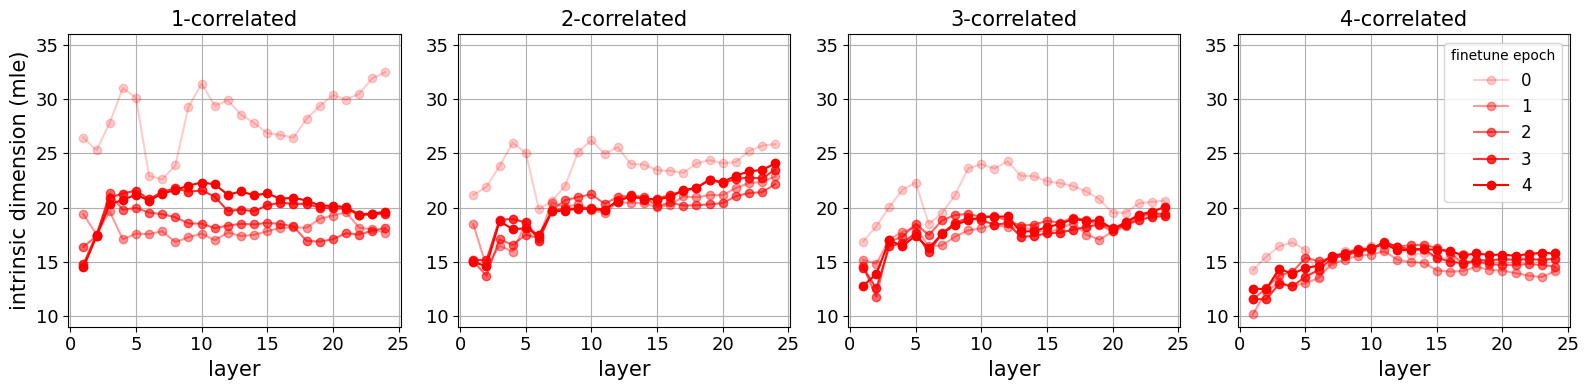

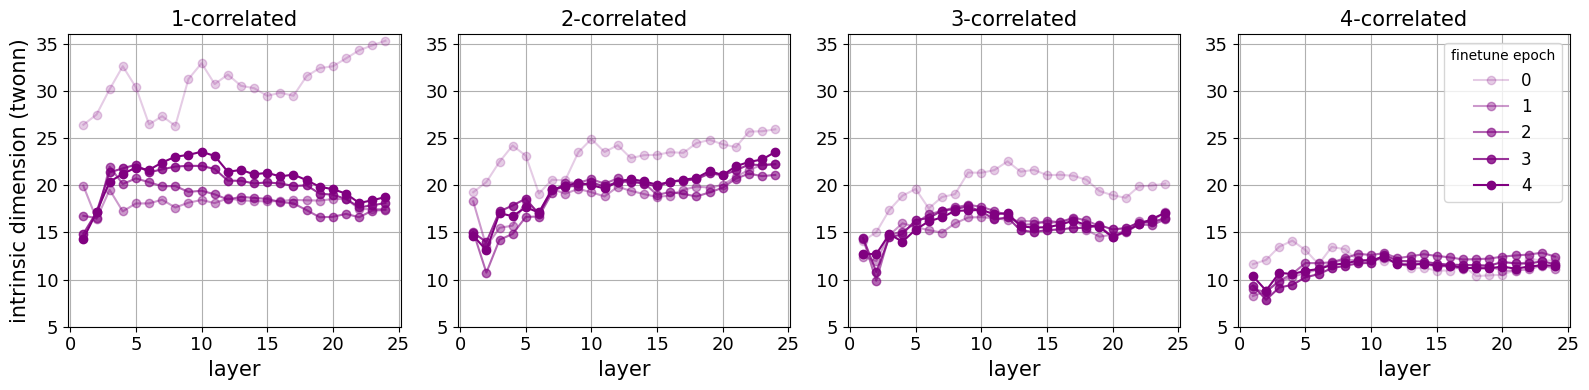

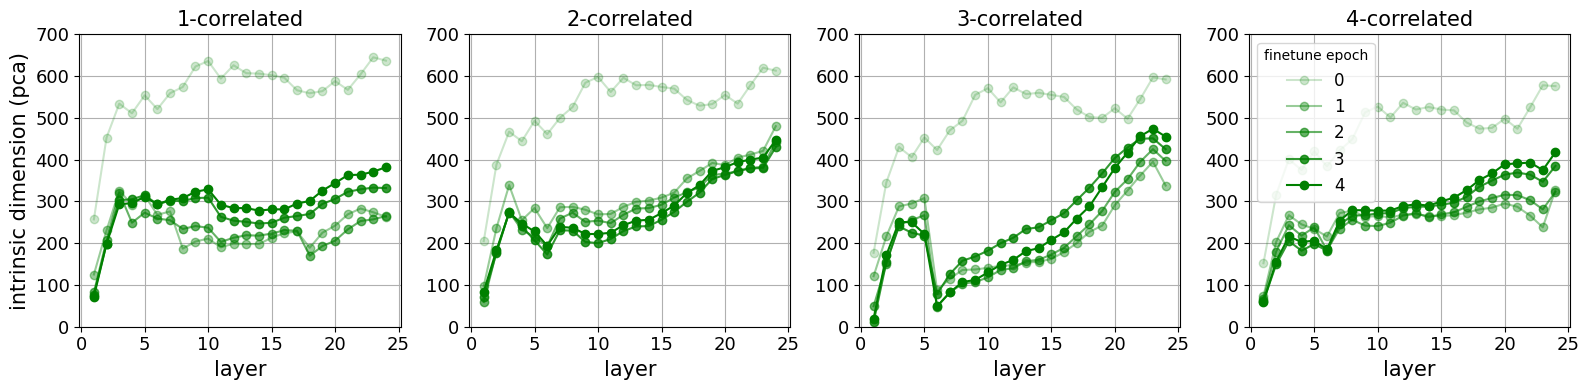

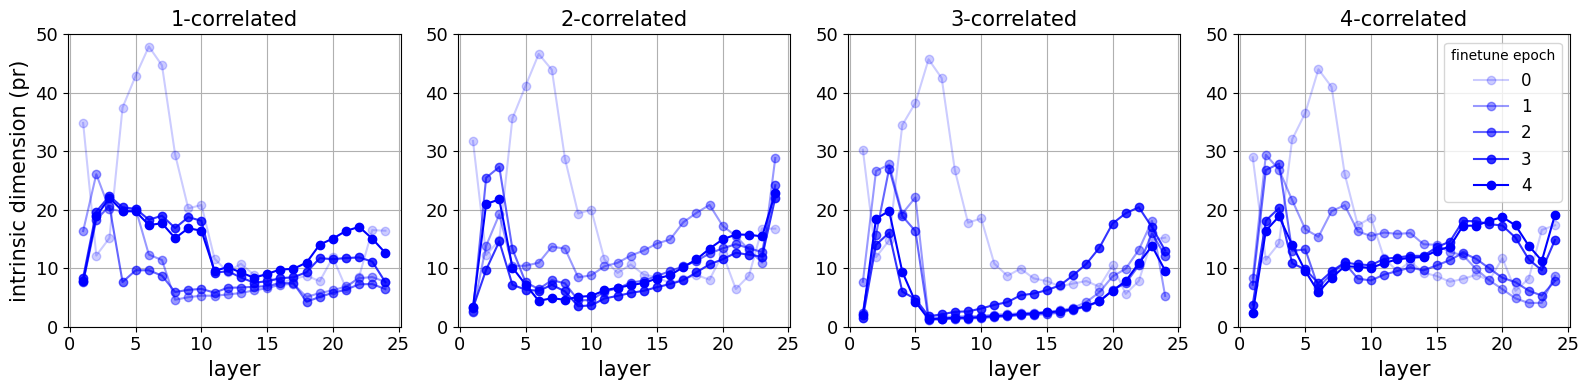

In [44]:
methods = {'mle': 'red', 'twonn': 'purple', 'pca': 'green', 'pr': 'blue'}
methods_ylim = {'mle': [9, 36], 'twonn': [5, 36], 'pca': [0, 700], 'pr': [0, 50]}


for method in methods:
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
    for i, PROMPT in enumerate(PROMPTS):
        ax = axs[i]
        for j, ckpt in enumerate(CKPTS):
            with open(fileformat.format(PROMPT, ckpt), 'r') as f:
                results = json.load(f)
        
            
            id = results[method]['id'] if method in ['mle', 'twonn'] else results['pca'][f'{method}_id']
            
            ax.plot(range(1, len(id)+1), id, label=j, alpha = 0.2 * (j + 1), color=methods[method], marker='o')
            ax.set_title(f'{PROMPT}-correlated', fontsize=15)
            ax.set_ylim(methods_ylim[method])
            ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
            ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
        
        axs[0].set_ylabel(f'intrinsic dimension ({method})', fontsize=15)
        axs[-1].legend(title='finetune epoch', fontsize=12)
        ax.set_xlabel('layer', fontsize=15)
        ax.grid()
        
    fig.tight_layout()
    for ext in 'png', 'pdf':
        fig.savefig(f'/home/echeng/llm_compositionality/results/plots/{method}_finetuning_id_train_data.{ext}')